In [1]:
%matplotlib inline

import datacube
from deafrica_tools.plotting import rgb, display_map
import datacube
import odc.algo
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog

from deafrica_tools.plotting import display_map, rgb
dc = datacube.Datacube(app="04_Plotting")
# 15.85828652, 80.78694696
# 15.75418332, 81.02203692
lat_range = (15.75418332, 15.85828652)
lon_range = (80.78694696, 81.02203692)
time_range = ('2022-01-15', '2023-05-01')
# display_map(x=lon_range, y=lat_range)
ds = dc.load(product="ls_9_c2_l2",
                 measurements=["SR_B4","SR_B3","SR_B2", "SR_B5"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:6933',
             resolution=(-10, 10))

print(ds)

<xarray.Dataset>
Dimensions:      (time: 1, y: 1280, x: 2269)
Coordinates:
  * time         (time) datetime64[ns] 2023-04-21T03:49:28
  * y            (y) float64 1.998e+06 1.998e+06 ... 1.985e+06 1.985e+06
  * x            (x) float64 7.795e+06 7.795e+06 ... 7.818e+06 7.818e+06
    spatial_ref  int32 6933
Data variables:
    SR_B4        (time, y, x) uint16 9187 9188 9188 9185 ... 11227 11227 11227
    SR_B3        (time, y, x) uint16 10205 10207 10207 ... 11111 11111 11111
    SR_B2        (time, y, x) uint16 8619 8608 8608 8605 ... 9933 9933 9933
    SR_B5        (time, y, x) uint16 20373 20458 20458 20585 ... 9462 9462 9462
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


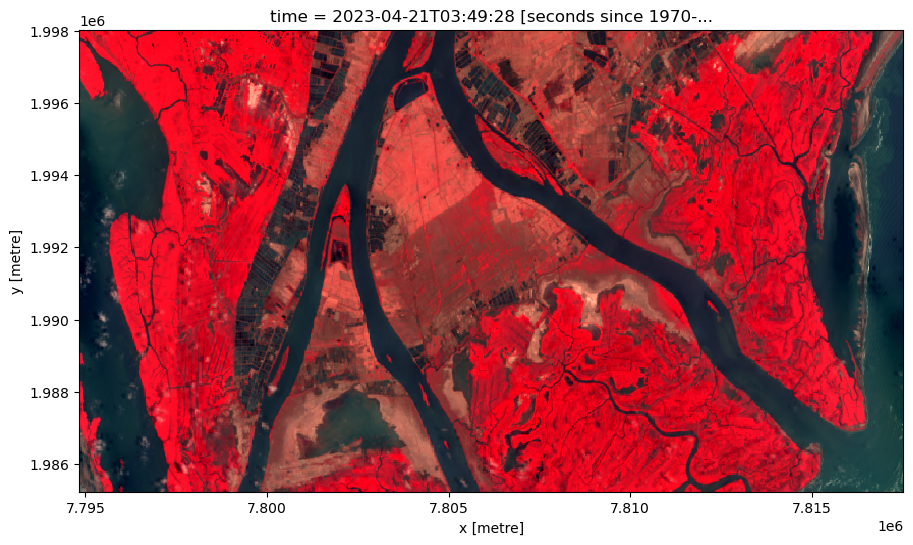

In [2]:
# Load the data from the Datacube
dataset = ds
# scl = ds['SCL_20m']
# clear_pixels = (scl != 3) & (scl != 8) & (scl != 9)
# print(clear_pixels)
# ndvi_masked = ndvi.where(clear_pixels)
# print(ndvi_masked)
rgb(ds, bands=['SR_B5', 'SR_B4', 'SR_B3'], index=[0])

In [4]:
# convert dataset to float32 datatype so no-data values are set to NaN
dataset =  odc.algo.to_f32(dataset)

# Calculate the components that make up the NDVI calculation
band_diff = dataset.SR_B5 - dataset.SR_B4
band_sum = dataset.SR_B5 + dataset.SR_B4

# Calculate NDVI and store it as a measurement in the original dataset
ndvi = band_diff / band_sum
print(ndvi)

<xarray.DataArray (time: 1, y: 1280, x: 2269)>
array([[[ 0.37841678,  0.38015246,  0.38015246, ...,  0.05408196,
          0.05408196,  0.05408196],
        [ 0.37841678,  0.38015246,  0.38015246, ...,  0.05408196,
          0.05408196,  0.05408196],
        [ 0.37841678,  0.38015246,  0.38015246, ...,  0.04604506,
          0.04604506,  0.04604506],
        ...,
        [-0.04147833, -0.04147833, -0.02709349, ..., -0.08484353,
         -0.08484353, -0.08484353],
        [-0.04147833, -0.04147833, -0.02709349, ..., -0.08531103,
         -0.08531103, -0.08531103],
        [-0.03124576, -0.03124576, -0.01426912, ..., -0.08531103,
         -0.08531103, -0.08531103]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2023-04-21T03:49:28
  * y            (y) float64 1.998e+06 1.998e+06 ... 1.985e+06 1.985e+06
  * x            (x) float64 7.795e+06 7.795e+06 ... 7.818e+06 7.818e+06
    spatial_ref  int32 6933


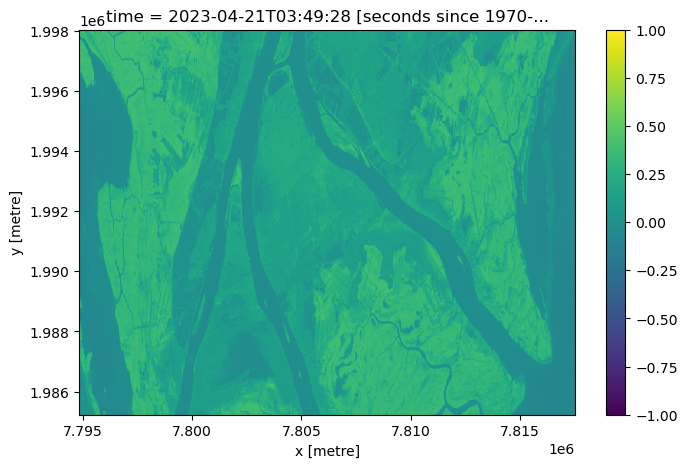

In [5]:
plt.figure(figsize=(8, 5))
ndvi.plot(vmin=-1, vmax=1, col_wrap=1)
plt.show()